/Users/robertbress/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/robertbress/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/robertbress/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

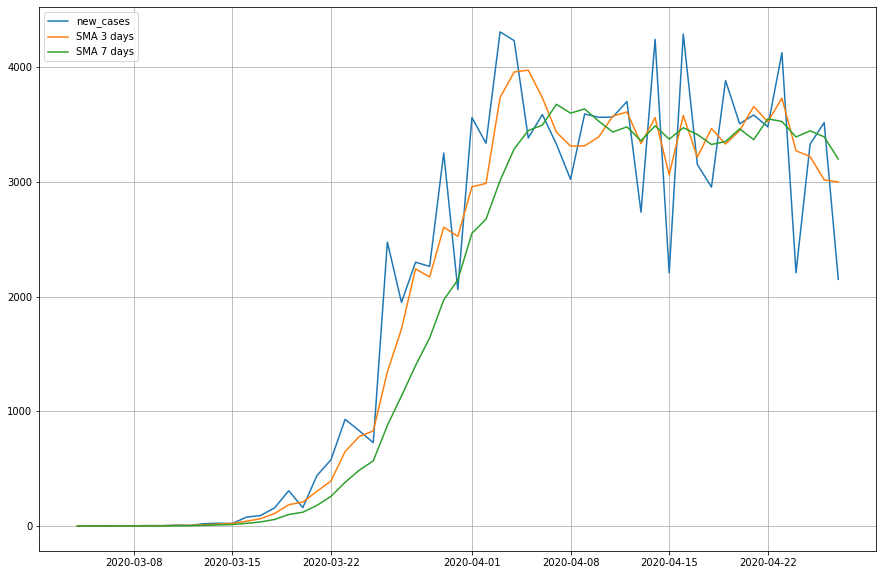

In [174]:
#Import Libraries

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

#Load data into dataframe, take only nj data

data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'])
nj_df = data[data["state"] == 'New Jersey']

#Calculate daily new cases by taking first differences of cumulative cases 

diff = nj_df['cases'].diff()
nj_df['new_cases'] = diff

#reset indices since we pulled only nj data

nj_df.reset_index(inplace=True)

#calculate 3 and 7 day moving averages

nj_df['pandas_SMA_3'] = nj_df.iloc[:,6].rolling(window=3).mean()
nj_df['pandas_SMA_7'] = nj_df.iloc[:,6].rolling(window=7).mean()

#First 3 and 7 days will have an NA value for respective moving averages, replace with 0
nj_df.fillna(0, inplace=True)

#Plot daily new cases and moving averages series
nj_df = nj_df.set_index(nj_df['date'])
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(nj_df['new_cases'],label='new_cases')
plt.plot(nj_df['pandas_SMA_3'],label='SMA 3 days')
plt.plot(nj_df['pandas_SMA_7'],label='SMA 7 days')
plt.legend(loc=2)


